In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os, types
from botocore.client import Config
import ibm_boto3
%matplotlib inline

In [2]:
#System generated code for importing matches.csv in the notebook had to be removed due to security reasons.
    
#Data from csv is read and imported into "matches" variable
matches = pd.read_csv(matches.csv)

#Checking for successful import
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#Understanding basic attributes of the imported file
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [4]:
#Importing columns: team1,team2 and city, for cleaning and manipulation

teams_1=matches['team1'].value_counts().sort_index(ascending=True).keys()
teams_2=matches['team2'].value_counts().sort_index(ascending=True).keys()
city=matches['city'].value_counts().sort_index(ascending=True).keys()

In [5]:
#Creating a list of all the teams that participated in IPL

teams=teams_1
for t in teams_2:
    if (t in teams_1):
        continue
    teams.append(t)
teams

Index(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'],
      dtype='object')

In [6]:
#Data Cleaning

matches.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace = True)
matches.replace('Bangalore','Bengaluru', inplace = True)
matches.replace("AK Chaudhary", "Anil Chaudhary", inplace = True)
matches.replace("O Nandan", "CK Nandan", inplace = True)
matches.replace("Bruce Oxenford", "BNJ Oxenford", inplace = True)
matches.replace("Nigel Llong", "NJ Llong", inplace = True)
matches.replace("Nanda Kishore", "A Nand Kishore", inplace = True)
matches.replace("Nand Kishore", "A Nand Kishore", inplace = True)
matches.replace("A Nanda Kishore", "A Nand Kishore", inplace = True)
matches.replace("AY Dandekar", "Anil Dandekar", inplace = True)
matches.replace("Marais Erasm", "M Erasmus", inplace = True)

In [7]:
#Replacing teams with a unique team numbers for easier analysis
i=1
for t in teams:
    matches["team1"]= matches["team1"].replace(t,i)
    matches["team2"]= matches["team2"].replace(t,i)
    matches["toss_winner"]= matches["toss_winner"].replace(t,i)
    matches["winner"]= matches["winner"].replace(t,i)
    i=i+1

#Replacing cities with a unique city numbers for easier analysis
i=1
for c in city:
    matches["city"]= matches["city"].replace(c,i)
    i=i+1
    
#Checking for successful alterations
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,15.0,2017-04-05,15,14,14,field,normal,0,15.0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",Anil Dandekar,NJ Llong,NaN
1,2,2017,27.0,2017-04-06,9,13,13,field,normal,0,13.0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,29.0,2017-04-07,5,8,8,field,normal,0,8.0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,16.0,2017-04-08,13,6,6,field,normal,0,6.0,0,6,GJ Maxwell,Holkar Cricket Stadium,Anil Chaudhary,C Shamshuddin,NaN
4,5,2017,4.0,2017-04-08,14,4,14,bat,normal,0,14.0,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<AxesSubplot:ylabel='winner'>

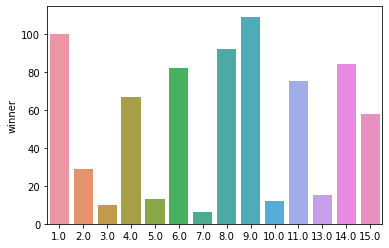

In [8]:
#Plotting a graph between the assigned team number and teams that won the most matches
sns.barplot(x=matches['winner'].value_counts().keys(),y=matches['winner'].value_counts())

In [9]:
##1 To find the team that won the most number of matches in the entire IPL.

top_winner=teams[(int((list((matches['winner'].value_counts().head(1)).keys()))[0]))-1]
print("Team that won the most number of matches in the entire IPL is",top_winner)

Team that won the most number of matches in the entire IPL is Mumbai Indians


In [10]:
##2 To find the team that lost the most number of matches in the entire IPL.

teams1 = matches['team1'].value_counts().sort_index(ascending=True)
teams2 = matches['team2'].value_counts().sort_index(ascending=True)
matches_played = teams1 + teams2

won=matches['winner'].value_counts().sort_index(ascending=True)
lost = matches_played - won
index = lost.idxmax()
print("Team that lost the most number of matches in the entire IPL is",teams[index-1])

Team that lost the most number of matches in the entire IPL is Royal Challengers Bangalore


In [11]:
##3 Does winning a toss increase the chances of victory.
"""tnm_win is a temporary list containing: 
            '1' for all the matches where the toss winners won the match as well,
            '0' for all the other cases.
   ele is the element wise iterator for the given dataset.
   tw and mw stand for toss winner and match winner, respectively.
"""

tnm_win=[]
for ele in matches['id']:
    tw=list(matches[matches['id']==ele]['toss_winner'])[0]
    mw=list(matches[matches['id']==ele]['winner'])[0]
    if tw==mw:
        tnm_win.append(1)
    else:
        tnm_win.append(0)
toss2win=pd.Series(tnm_win)
#toss2win

In [12]:
##4 To find the player with the most player of the match awards.

man_of_the_match=list((matches['player_of_match'].value_counts().head(1)).keys())[0]
print("Player with the most player of the match awards is",man_of_the_match)

Player with the most player of the match awards is CH Gayle


In [13]:
##5 To find the city that hosted the maximum number of IPL matches.

venue=city[(int(list((matches['city'].value_counts().head(1)).keys())[0]))-1]
print("City that hosted the maximum number of IPL matches is",venue)

City that hosted the maximum number of IPL matches is Mumbai


In [14]:
##6 To find the most winning team for each season.

season = list((matches['season'].value_counts()).keys())
most_win = []
top_team = []
year=[]
#season = list(season)
season.sort()
for i in season:
    x=matches[matches['season']==i]['winner'].value_counts().head(1)
    most_win.append((list(x))[0])
    x=int((x.keys())[0])
    top_team.append(teams[x-1])
    year.append(i)
    print("Most winning team of",i,"season is",teams[x-1])


year=pd.Series(year)
top_team=pd.Series(top_team)
most_win=pd.Series(most_win)

matches["year"]=year
matches["top_team"]=top_team
matches["most_win"]=most_win

Most winning team of 2008 season is Rajasthan Royals
Most winning team of 2009 season is Delhi Daredevils
Most winning team of 2010 season is Mumbai Indians
Most winning team of 2011 season is Chennai Super Kings
Most winning team of 2012 season is Kolkata Knight Riders
Most winning team of 2013 season is Mumbai Indians
Most winning team of 2014 season is Kings XI Punjab
Most winning team of 2015 season is Mumbai Indians
Most winning team of 2016 season is Sunrisers Hyderabad
Most winning team of 2017 season is Mumbai Indians
Most winning team of 2018 season is Chennai Super Kings
Most winning team of 2019 season is Mumbai Indians


In [15]:
##7 To find the on-field umpire with the maximum number of IPL matches.

data = pd.DataFrame({"umpire":matches["umpire1"].tolist() + matches["umpire2"].tolist()},columns=['umpire'])

x = list(data["umpire"].value_counts().index[:])
y = list(data["umpire"].value_counts().values[:])
k = len(matches["umpire1"])-len(y)
arr = [0 for i in range(k)]
y=y+arr

a = ["NaN" for i in range(k)]
x.extend(a)

matches["umpires"] =x
matches["umpire_values"] =y
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_of_match,venue,umpire1,umpire2,umpire3,year,top_team,most_win,umpires,umpire_values
0,1,2017,15.0,2017-04-05,15,14,14,field,normal,0,...,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",Anil Dandekar,NJ Llong,NaN,2008.0,Rajasthan Royals,13.0,S Ravi,106
1,2,2017,27.0,2017-04-06,9,13,13,field,normal,0,...,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2009.0,Delhi Daredevils,10.0,HDPK Dharmasena,87
2,3,2017,29.0,2017-04-07,5,8,8,field,normal,0,...,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2010.0,Mumbai Indians,11.0,Anil Chaudhary,79
3,4,2017,16.0,2017-04-08,13,6,6,field,normal,0,...,GJ Maxwell,Holkar Cricket Stadium,Anil Chaudhary,C Shamshuddin,NaN,2011.0,Chennai Super Kings,11.0,C Shamshuddin,73
4,5,2017,4.0,2017-04-08,14,4,14,bat,normal,0,...,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2012.0,Kolkata Knight Riders,12.0,CK Nandan,57


In [16]:
##8-(1) To find the biggest victories in IPL while defending a total.

biggest_win_run=matches['win_by_runs'].max()
print("Biggest victories while defending a total is by",biggest_win_run,"runs")

Biggest victories while defending a total is by 146 runs


In [17]:
##8-(2) To find the biggest victories in IPL while chasing a total.

biggest_win_wicket=matches['win_by_wickets'].max()
print("Biggest victories while chasing a total is by",biggest_win_wicket,"wickets")

Biggest victories while chasing a total is by 10 wickets


In [18]:
##9 Which team won the most matches while batting first.
"""winners is a temporary list containing the names of the teams which won the match batting first.
   ele is the element wise iterator for the given dataset.
   t1,t2 and w stand for team 1, team 2 and match winner, respectively.
"""
winners=[0 for i in range(756)]
losser=[]
counter=0
for ele in matches['id']:
    t1=list(matches[matches['id']==ele]['team1'])[0]
    t2=list(matches[matches['id']==ele]['team2'])[0]
    w=list(matches[matches['id']==ele]['winner'])[0]
    if t1==w:
        winners[counter]=t1
        losser.append(t2)
        counter=counter+1
    elif t2==w:
        losser.append(t1)
    else:
        losser.append(0)
team_batting_first_win_count=pd.Series(winners)
losser_team=pd.Series(losser)
#team_batting_first_win_count
#losser_team

In [19]:
##10 Which team won the most matches while batting second.
"""winners is a temporary list containing the names of the teams which won the match batting second.
   ele is the element wise iterator for the given dataset.
   t1,t2 and w stand for team 1, team 2 and match winner, respectively.
"""
winners=[0 for i in range(756)]
counter=0
for ele in matches['id']:
    t2=list(matches[matches['id']==ele]['team2'])[0]
    w=list(matches[matches['id']==ele]['winner'])[0]
    if t2==w:
        winners[counter]=t2
        counter=counter+1
team_batting_second_win_count=pd.Series(winners)
#team_batting_second_win_count

In [20]:
#11 List of teams which have won matches by most runs cumulatively
"""No major manipulation was required for this sub-set"""
"""for i in season:
    max_score=matches[matches['season']==i]['win_by_runs'].max()
    most_runs=list(matches[matches['win_by_runs']==max_score]['winner'])"""

#print("The team which has won matches by most runs cumulatively is",most_runs[0])

"for i in season:\n    max_score=matches[matches['season']==i]['win_by_runs'].max()\n    most_runs=list(matches[matches['win_by_runs']==max_score]['winner'])"

In [21]:
# Relevant data is inserted in the database as new fields

matches["bat_first_winner"]=team_batting_first_win_count
matches["bat_second_winner"]=team_batting_second_win_count
matches["losser"]=losser_team
matches["toss2win"]=toss2win
#matches.head()

In [22]:
"""Final data transformation to original form"""

'Final data transformation to original form'

In [23]:
matches.to_csv('copy1.csv')
cp = pd.read_csv('copy1.csv')

#Replacing numbers with teams
t=1
matches=cp
for i in teams:
    matches["team1"]= matches["team1"].replace(t,i)
    matches["bat_first_winner"]= matches["bat_first_winner"].replace(t,i)
    matches["losser"]= matches["losser"].replace(t,i)
    matches["bat_second_winner"]= matches["bat_second_winner"].replace(t,i)
    matches["team2"]= matches["team2"].replace(t,i)
    matches["toss_winner"]= matches["toss_winner"].replace(t,i)
    matches["winner"]= matches["winner"].replace(t,i)
    t=t+1

#Replacing cities with numbers
c=1
for i in city:
    matches["city"]= matches["city"].replace(c,i)
    c=c+1

cp.drop('Unnamed: 0',inplace=True,axis=1)
cp.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,umpire3,year,top_team,most_win,umpires,umpire_values,bat_first_winner,bat_second_winner,losser,toss2win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,NaN,2008.0,Rajasthan Royals,13.0,S Ravi,106,Sunrisers Hyderabad,Rising Pune Supergiants,Royal Challengers Bangalore,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,...,NaN,2009.0,Delhi Daredevils,10.0,HDPK Dharmasena,87,Royal Challengers Bangalore,Kolkata Knight Riders,Mumbai Indians,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,NaN,2010.0,Mumbai Indians,11.0,Anil Chaudhary,79,Delhi Daredevils,Kings XI Punjab,Gujarat Lions,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,NaN,2011.0,Chennai Super Kings,11.0,C Shamshuddin,73,Kolkata Knight Riders,Sunrisers Hyderabad,Rising Pune Supergiants,1
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,NaN,2012.0,Kolkata Knight Riders,12.0,CK Nandan,57,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,1


In [24]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "copy2.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
#df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df=cp

# create a link to download the dataframe
create_download_link(df)